# Logistic Regression

In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.labelpad'] = 10

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

## Define the sigmoid function
### $f(z) = \dfrac{1}{1 + e^{-z}}$

In [3]:
def sigmoid(z):
    """Returns value of the sigmoid function."""
    return 1/(1 + np.exp(-z))

## Plot the sigmoid function

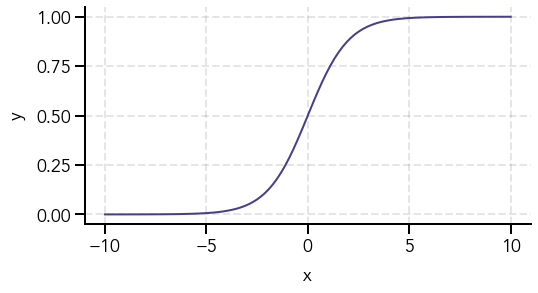

In [4]:
# Calculate sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Create figure
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Plot sigmoid
ax.plot(x, y, linewidth=2, color='#483d8b')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Edit y-ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])

# Edit axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Generate some initial data and plot

In [5]:
# For reproducibility - will seed psuedorandom numbers at same point
np.random.seed(1827492)

# Random x1 and x2 values
x1 = np.random.random(size=100)
x2 = np.random.random(size=100)

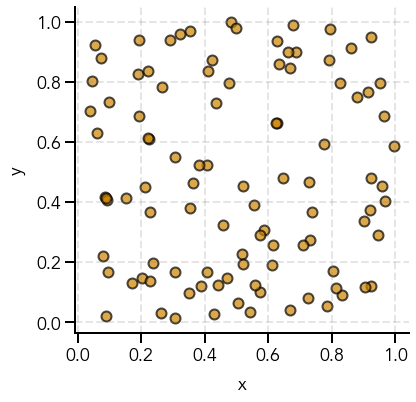

In [6]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors of scatter points
colors = ['#cc8400', '#483d8b']

# Plot sample data
ax.scatter(x1, x2, color=colors[0], s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Create a decision boundary
### $1.5 + 2 x_1 - 5 x_2 = 0$  
We will set $y = 1$ above this boundary and $y = 0$ below (we will add some noise when labelling our data)

In [7]:
y = np.zeros(len(x1))

# Set y = 1 above decision boundary
for i in range(len(y)):
    if (1.5 + 2*x1[i] - 5*x2[i] + 0.5*np.random.normal()) <= 0:
        y[i] = 1
    else:
        y[i] = 0

## Plot our data with color contrast to show decision boundary

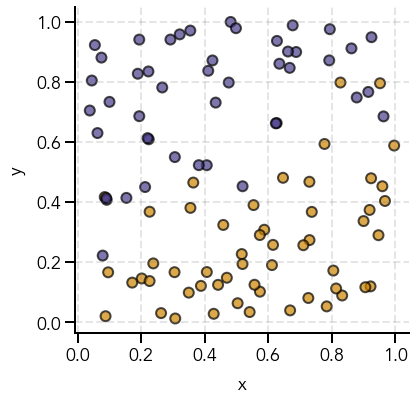

In [8]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b']
colors_data = [colors[int(i)] for i in y]

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Define cost function and gradient

### Cost  
&nbsp;  

$J(w_0 \ldots w_n) = -\dfrac{1}{m}\sum\limits_{i = 1}^m \left[ y^i \log(h_w(x^i)) + (1 - y^i) \log(1 - h_w(x^i))\right]$  
&nbsp;  

where our <b>hypothesis function</b> $h_w(x^i)$ is:  
&nbsp;  

$h_w(x_0^i \ldots x_n^i) = \dfrac{1}{1 + \exp (-z)}$ where $z = \sum \limits_{j = 0}^n w_j x_j^i$  
&nbsp;  

### Gradient  
&nbsp;  

Use chain rule to find derivative:  
&nbsp;  

$\dfrac{\partial J}{\partial w_j} = \dfrac{\partial J}{\partial h_w} \cdot \dfrac{\partial h_w}{\partial z} \cdot \dfrac{\partial z}{\partial w_j}$  
&nbsp;  

$\dfrac{\partial J}{\partial h_w} = -\dfrac{1}{m}\sum\limits_{i = 1}^m \left[ y^i \left(\dfrac{1}{h_w}\right) + (1 - y^i) \left(\dfrac{1}{h_w - 1}\right)\right]$  
&nbsp;  

$\dfrac{\partial h_w}{\partial z} = \dfrac{e^{-z}}{(1 + e^{-z})^2} = h_w \cdot (1 - h_w)$  
&nbsp;  

$\dfrac{\partial z}{\partial w_j} = x_j^i$  
&nbsp;  

Combining all three partial derivatives, we get:  
&nbsp;  

$\dfrac{\partial J}{\partial w_j} = \dfrac{1}{m}\sum\limits_{i = 1}^m \left[h_w(x^i) - y^i\right] \cdot x^i_j$  
&nbsp;  

### Gradient descent update  
&nbsp;  

$w_j = w_j - \dfrac{\alpha}{m}\sum\limits_{i = 1}^m \left[h_w(x^i) - y^i\right] \cdot x^i_j$

In [9]:
def cost_function(X, y, w):
    """
    Returns cost function and gradient

    Parameters
        X: m x (n+1) matrix of features
        y: m x 1 vector of labels
        w: (n+1) x 1 vector of weights
    Returns
        cost: value of cost function
        grad: (n+1) x 1 vector of weight gradients
    """
    
    m = len(y)
    h = sigmoid(np.dot(X, w))
    cost = (1/m)*(-np.dot(y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h)))
    grad = (1/m)*np.dot(X.T, h - y)
    return cost, grad

## Gradient descent algorithm

In [10]:
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Uses gradient descent to minimize cost function.
    
    Parameters
        X: m x (n+1) matrix of features
        y: m x 1 vector of labels
        w: (n+1) x 1 vector of weights
        alpha (float): learning rate
        num_iters (int): number of iterations
    Returns
        J: 1 x num_iters vector of costs
        w_new: (n+1) x 1 vector of optimized weights
        w_hist: (n+1) x num_iters matrix of weights
    """

    w_new = np.copy(w)
    w_hist = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)

    for i in range(num_iters):
        cost, grad = cost_function(X, y, w_new)
        w_new = w_new - alpha*grad
        w_hist = np.concatenate((w_hist, w_new), axis=1)
        J[i] = cost
    return J, w_new, w_hist

## Initialize variables

In [11]:
X = np.concatenate((np.ones(shape=(len(x1), 1)), x1.reshape(len(x1), 1), x2.reshape(len(x2), 1)), axis=1)
y = y.reshape(len(y), 1)
w = np.zeros(shape=(3, 1))

## Initial value of the cost function

In [12]:
print('Initial cost: %.2f' % cost_function(X, y, w)[0])

Initial cost: 0.69


## Train the model with gradient descent

In [13]:
# Calculate decision boundary
J, w_train, w_hist = gradient_descent(X, y, w, 2, 2000)

## Values of $w_0, w_1, w_2$ after training

In [14]:
print('w_0: %.3f,\nw_2: %.3f,\nw_3: %.3f' % (w_train[0], w_train[1], w_train[2]))

w_0: -3.985,
w_2: -7.998,
w_3: 15.600


## Plot the cost function with iterations

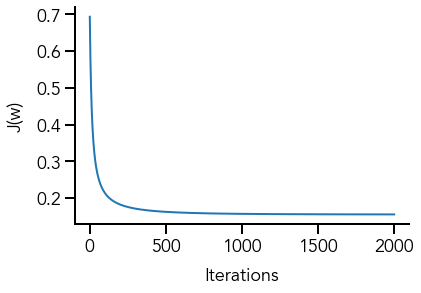

In [15]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot costs
ax.plot(range(len(J)), J, linewidth=2)

# Add axis labels
ax.set(xlabel='Iterations', ylabel=r'J(w)')

plt.show()

## Plot original data along with the decision boundary
### To calculate the decision boundary we use:
### $w_0 + w_1 x_1 + w_2 x_2 = 0$  
(value where the sigmoid function is 0.5)

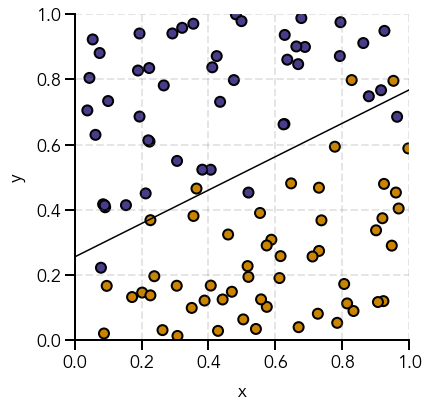

In [16]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b']
colors_data = [colors[int(i)] for i in y]

# Plot decision boundary
x1_bound, x2_bound = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
prob = sigmoid(w_train[0] + x1_bound*w_train[1] + x2_bound*w_train[2])
ax.contour(x1_bound, x2_bound, prob, levels=[0.5], colors='black')

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=1)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Train with `sklearn`

In [17]:
clf = LogisticRegression(random_state=0, max_iter=500, fit_intercept=False).fit(X, y)

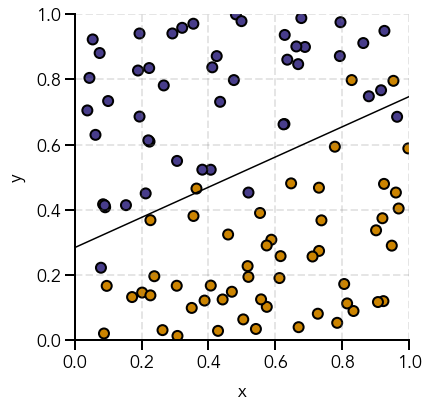

In [18]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b']
colors_data = [colors[int(i)] for i in y]

# Coefficients from SKLearn
coeffs = clf.coef_.ravel()

# Plot decision boundary
x1_bound, x2_bound = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
prob = sigmoid(coeffs[0] + x1_bound*coeffs[1] + x2_bound*coeffs[2])
ax.contour(x1_bound, x2_bound, prob, levels=[0.5], colors='black')

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=1)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Create function to predict a classifier from our model

In [19]:
def predict(X, w):
    """
    Predicts classifiers based on weights

    Parameters
        X: m x n matrix of features
        w: n x 1 vector of weights
    
    Returns
        predictions: m x 1 vector of predictions
    """

    predictions = sigmoid(np.dot(X, w))

    for i, val in enumerate(predictions):
        if val >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions


## Calculate accuracy of classifier on labelled data

In [20]:
def calc_accuracy(X, y, w):
    """
    Calculates accuracy of classifier on training data

    Parameters
        X: m x n matrix of features
        y: m x 1 vector of labels
        w: n x 1 vector of weights
    Returns
        accuracy (float): accuracy of model
    """

    predictions = predict(X, w)
    correct_predictions = np.zeros(shape=y.size)
    for i in range(len(y)):
        if predictions[i] == y[i]:
            correct_predictions[i] = 1
    return sum(correct_predictions)/len(correct_predictions)

## Compare the accuracy of our model and `sklearn`

In [21]:
print('My model accuracy: ' + str(calc_accuracy(X, y, w_train)))
print('sklearn accuracy: ' + str(clf.score(X, y)))

My model accuracy: 0.93
sklearn accuracy: 0.93


# Multiclass Classification  
  
## Generate random data

In [22]:
np.random.seed(7839374)

# Random x1 and x2 values
x1 = np.random.random(size=100)
x2 = np.random.random(size=100)

## Create 2 decision boundaries
### (1) $4 + 2 x_1 - 10 x_2 = 0$
### (2) $12 - 8 x_1 - 10 x_2 = 0$

In [23]:
y = np.zeros(len(x1))

# Set y = 1 above decision boundary
for i in range(len(y)):
    if (4 + 2*x1[i] - 10*x2[i] + 0.5*np.random.normal() <= 0) and (12 - 8*x1[i] - 10*x2[i] <= 0):
        y[i] = 2
    elif (4 + 2*x1[i] - 10*x2[i] + 0.5*np.random.normal() <= 0):
        y[i] = 1
    else:
        y[i] = 0

## Plot data with colors to distinguish labels

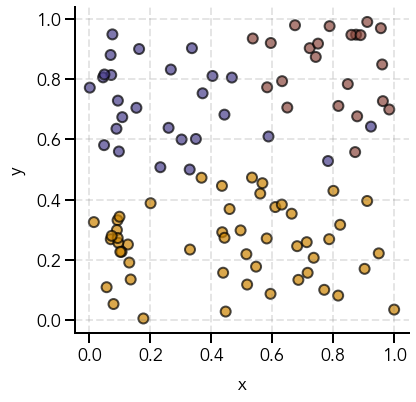

In [24]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b', '#8b483d']
colors_data = [colors[int(i)] for i in y]

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Define function to relabel data for one-vs-all classification

In [25]:
def relabel_data(y, label):
    """
    Relabels data for one-vs-all classifier

    Parameters
        y: m x 1 vector of labels
        label: which label to set to 1 (sets others to 0)
    
    Returns
        relabeled_data: m x 1 vector of relabeled data
    """

    relabeled_data = np.zeros(len(y))
    for i, val in enumerate(y):
        if val == label:
            relabeled_data[i] = 1
    return relabeled_data.reshape(len(y), 1)

In [26]:
# Initialize variables
X = np.concatenate((np.ones(shape=(len(x1), 1)), x1.reshape(len(x1), 1), x2.reshape(len(x2), 1)), axis=1)
y = y.reshape(len(y), 1)
w = np.zeros(shape=(3, 1))

## Calculate three classifiers

In [27]:
y_class1 = relabel_data(y, 0)
_, w_class1, _ = gradient_descent(X, y_class1, w, 2, 2000)

y_class2 = relabel_data(y, 1)
_, w_class2, _ = gradient_descent(X, y_class2, w, 2, 2000)

y_class3 = relabel_data(y, 2)
_, w_class3, _ = gradient_descent(X, y_class3, w, 2, 2000)

## Plot data with decision boundaries

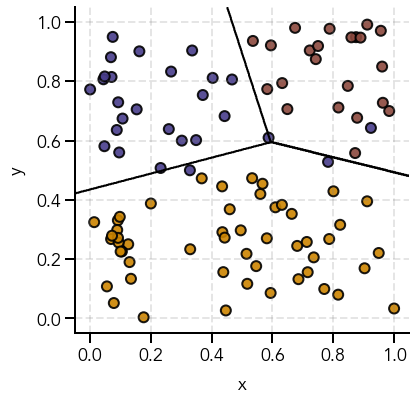

In [28]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b', '#8b483d']
colors_data = [colors[int(i)] for i in y]

# Plot decision boundaries
x1_bound, x2_bound = np.meshgrid(np.linspace(-0.05, 1.05, 500), np.linspace(-0.05, 1.05, 500))
prob_0 = sigmoid(w_class1[0] + x1_bound*w_class1[1] + x2_bound*w_class1[2])
prob_1 = sigmoid(w_class2[0] + x1_bound*w_class2[1] + x2_bound*w_class2[2])
prob_2 = sigmoid(w_class3[0] + x1_bound*w_class3[1] + x2_bound*w_class3[2])
prob_max = np.zeros(shape=x1_bound.shape)
for i in range(prob_max.shape[0]):
    for j in range(prob_max.shape[1]):
        maximum = max(prob_0[i][j], prob_1[i][j], prob_2[i][j])
        if maximum == prob_0[i][j]:
            prob_max[i][j] = 0
        elif maximum == prob_1[i][j]:
            prob_max[i][j] = 1
        else:
            prob_max[i][j] = 2

ax.contour(x1_bound, x2_bound, prob_max, levels=[0, 1, 2], colors='black', linewidths=2)

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.9)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlim=(-0.05, 1.05), ylim=(-0.05, 1.05), xlabel='x', ylabel='y')

plt.show()

## Train with `sklearn`

In [29]:
clf = LogisticRegression(random_state=0, max_iter=500, fit_intercept=False).fit(X, y)

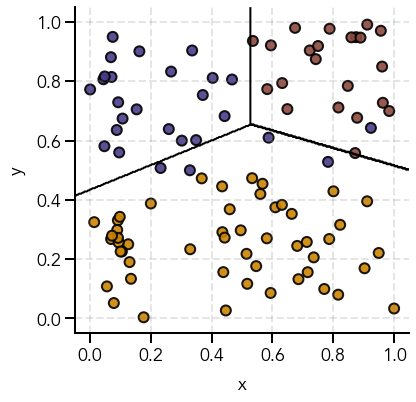

In [30]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#cc8400', '#483d8b', '#8b483d']
colors_data = [colors[int(i)] for i in y]

# Plot decision boundaries
x1_bound, x2_bound = np.meshgrid(np.linspace(-0.05, 1.05, 300), np.linspace(-0.05, 1.05, 300))
Z = clf.predict(np.c_[np.ones(shape=x1_bound.shape).ravel(), x1_bound.ravel(), x2_bound.ravel()]).reshape(x1_bound.shape)  

ax.contour(x1_bound, x2_bound, Z, levels=[0, 1, 2], colors='black', linewidths=2)

# Plot sample data
ax.scatter(x1, x2, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.9)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlim=(-0.05, 1.05), ylim=(-0.05, 1.05), xlabel='x', ylabel='y')

plt.show()